# LAB 04 - Image Processing (Full)

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread("imgg.jpg", 0)   
color = cv2.imread("imgg.jpg")   


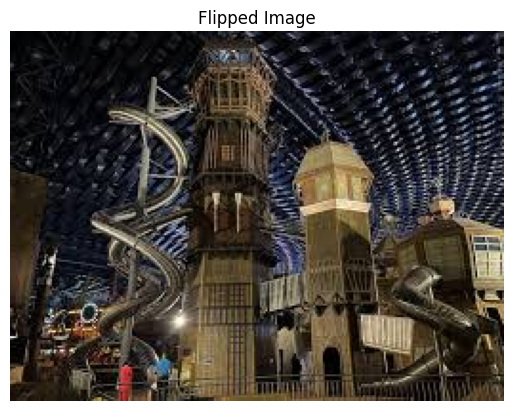

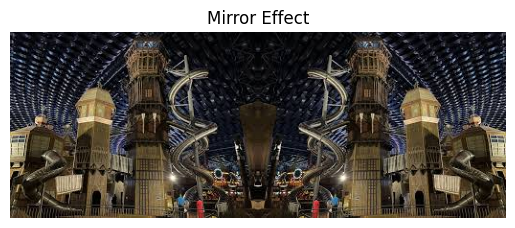

In [30]:
def flip_image(img):
    return cv2.flip(img, 1)

def mirror_effect(img):
    return np.hstack((img, flip_image(img)))

plt.imshow(cv2.cvtColor(flip_image(color), cv2.COLOR_BGR2RGB))
plt.title("Flipped Image")
plt.axis("off")
plt.show()

plt.imshow(cv2.cvtColor(mirror_effect(color), cv2.COLOR_BGR2RGB))
plt.title("Mirror Effect")
plt.axis("off")
plt.show()


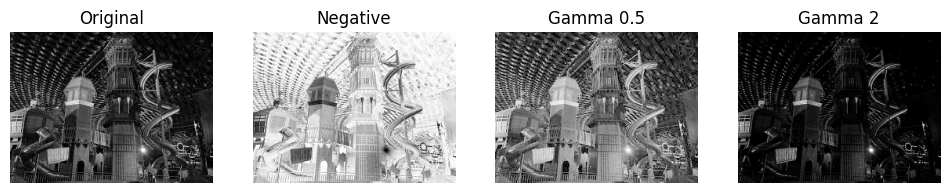

In [31]:
def negative(img):
    return 255 - img

def gamma_correction(img, c, gamma):
    I_norm = img.astype("float32") / 255
    out = c * (I_norm ** gamma)
    return np.clip(out * 255, 0, 255).astype("uint8")

def contrast_range(img, A, B):
    out = img.copy()
    out[(img >= A) & (img <= B)] = 255
    return out

neg = negative(img)
g05 = gamma_correction(img, 1, 0.5)
g2 = gamma_correction(img, 1, 2)
cr = contrast_range(img, 80, 160)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Original"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(1,4,2); plt.title("Negative"); plt.imshow(neg, cmap="gray"); plt.axis("off")
plt.subplot(1,4,3); plt.title("Gamma 0.5"); plt.imshow(g05, cmap="gray"); plt.axis("off")
plt.subplot(1,4,4); plt.title("Gamma 2"); plt.imshow(g2, cmap="gray"); plt.axis("off")
plt.show()


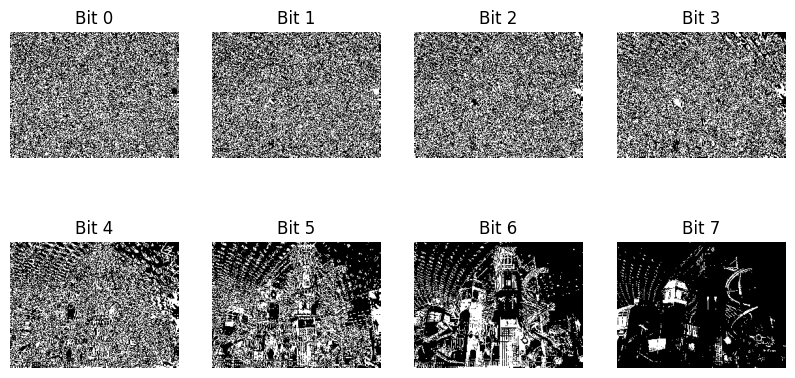

In [32]:
def displayBitResponse(img):
    plt.figure(figsize=(10,5))
    for i in range(8):
        plt.subplot(2,4,i+1)
        plane = (img >> i) & 1
        plt.imshow(plane, cmap="gray")
        plt.title(f"Bit {i}")
        plt.axis("off")
    plt.show()

displayBitResponse(img)


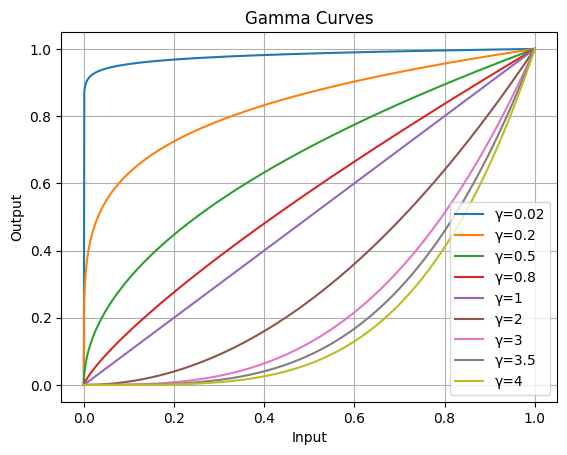

In [36]:
gammas = [0.02, 0.2, .5, .8, 1, 2, 3, 3.5, 4]
x = np.linspace(0, 1, 1000)

for g in gammas:
    plt.plot(x, x**g, label=f"γ={g}")

plt.legend()
plt.title("Gamma Curves")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()


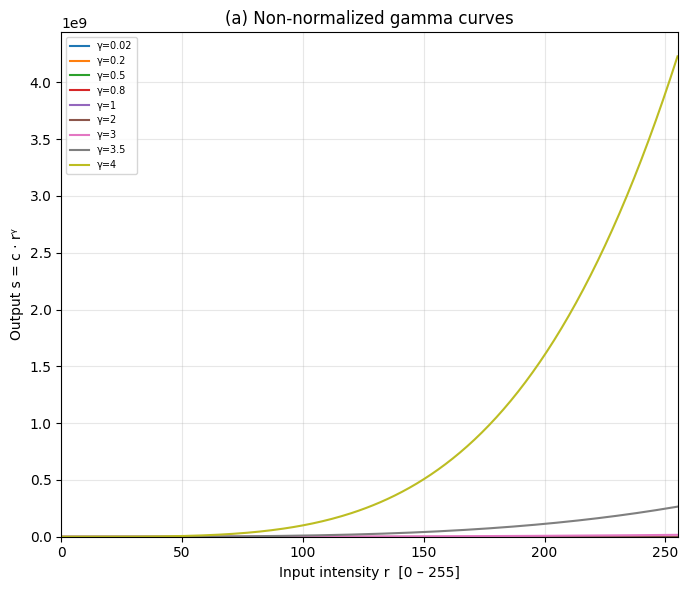

WHY curves don't meet at y=255:
  s(255) = 1 × 255^γ  →  equals 255 ONLY when γ=1.
  γ < 1 : 255^γ < 255  |  γ > 1 : 255^γ > 255 (clips to 255 in uint8 images)


In [37]:
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]
c = 1

x_raw = np.arange(0, 256, dtype=np.float32)

fig, ax = plt.subplots(figsize=(7, 6))
for g in gammas:
    ax.plot(x_raw, c * (x_raw ** g), label=f"γ={g}")
ax.set_xlabel("Input intensity r  [0 – 255]")
ax.set_ylabel("Output s = c · rᵞ")
ax.set_title("(a) Non-normalized gamma curves")
ax.legend(fontsize=7, loc='upper left')
ax.set_xlim(0, 255); ax.set_ylim(bottom=0)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("WHY curves don't meet at y=255:")
print("  s(255) = 1 × 255^γ  →  equals 255 ONLY when γ=1.")
print("  γ < 1 : 255^γ < 255  |  γ > 1 : 255^γ > 255 (clips to 255 in uint8 images)")

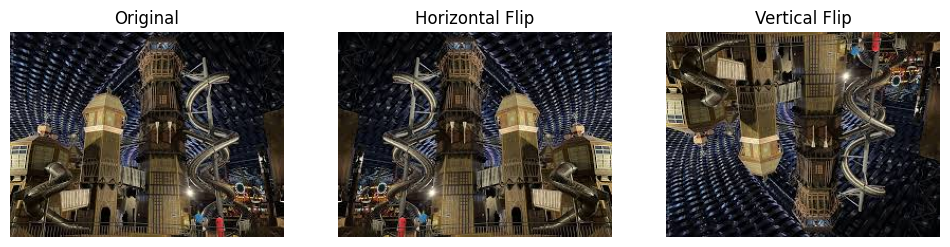

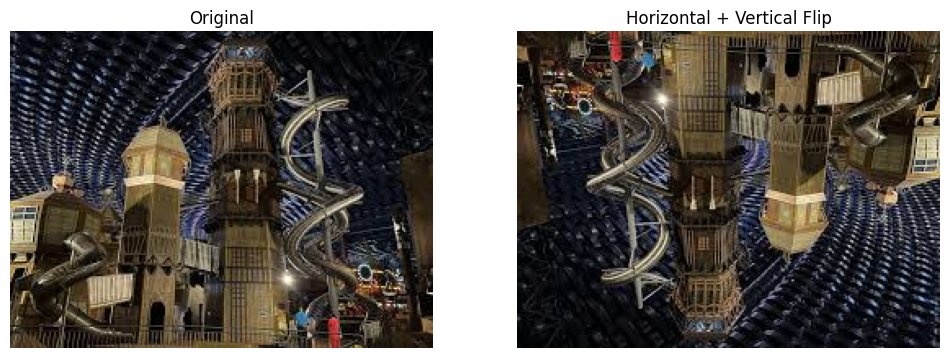

In [40]:
# horizontal flip
hflip = cv2.flip(color, 1)

# vertical flip
vflip = cv2.flip(color, 0)
plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(1,3,2); plt.title("Horizontal Flip"); plt.imshow(cv2.cvtColor(hflip, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(1,3,3); plt.title("Vertical Flip"); plt.imshow(cv2.cvtColor(vflip, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.show()

#both flips
hvflip = cv2.flip(color, -1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.title("Original"); plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(1,2,2); plt.title("Horizontal + Vertical Flip"); plt.imshow(cv2.cvtColor(hvflip, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.show()  
